<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_007_Polyfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

# 내삽법 및 외삽법

샘플링하여 측정한 데이터로부터 샘플링한 점 사이의 값을 추측하거나 측정이 어려운 극한 값을 추측해야 하는 경우 각각 내삽(interpolation)과 외삽(extrapolation)을 사용하게 된다. 또한 측정값의 집합으로부터 경험적 공식(empirical formula)을 추출할 때도 내삽 및 외삽법을 사용한다.

정확한 매개 변수를 모른 채 시뮬레이션을 해야 할 때에도, 우선 적절한 매개 변수 범위에서 시뮬레이션을 몇 차례 돌려본 뒤, 올바른 결과값을 주는 매개 변수를 내삽법으로 추측할 수 있다.

간단한 내삽법 또는 외삽법으로는 선형 회귀법 및 다항식 근사가 있고, 기타 유리식 근사법이나 카이 제곱 근사법 등 다양한 근사법이 있다.

본 강의에서는 다항식 근사를 알아본다. 다항식 근사는  작은 범위에서 단순한 경향을 보이는 데이타에 대하여 쓸 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import polyfit, poly1d

In [ ]:
x_domain = np.linspace(0,10,11)
y_range = (x_domain - 5) **2 + (np.random.rand(11) - 0.5)*4

In [ ]:
y_range

array([23.51960656, 17.25467745, 10.00410705,  3.2891109 ,  1.67381093,
        0.66629263,  1.61387922,  2.84994555,  8.10713669, 16.27107754,
       26.07634231])

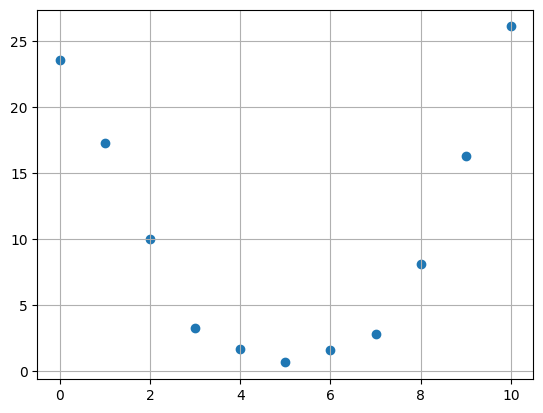

In [ ]:
plt.scatter(x_domain, y_range)
plt.grid()

In [ ]:
pc = polyfit(x_domain, y_range, 2)
pf = poly1d(pc)

<ipython-input-5-47f31f75405a>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pc = polyfit(x_domain, y_range, 2)


In [ ]:
pc

array([ 0.99521683, -9.93198555, 24.94788286])

In [ ]:
print(pf)

        2
0.9952 x - 9.932 x + 24.95


In [ ]:
xfit = np.linspace(0,10,1001)
yfit = pf(xfit)
yref = (xfit - 5)**2

$(x-5)^2 = x^2 - 10 x + 25$

에서 $x$의 2차, 1차, 0차 항의 계수:

$(1, -10, 25)$

In [ ]:
pc

array([ 0.99521683, -9.93198555, 24.94788286])

In [ ]:
pf

poly1d([ 0.99521683, -9.93198555, 24.94788286])

In [ ]:
print(pf)

        2
0.9952 x - 9.932 x + 24.95


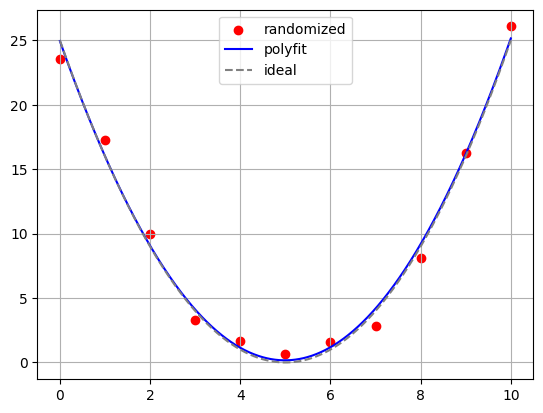

In [ ]:
plt.grid()
plt.scatter(x_domain, y_range, c='r',label="randomized")
plt.plot(xfit, yfit, c='b', label="polyfit")
plt.plot(xfit, yref, c='gray', ls='dashed', label="ideal")
plt.legend(loc='upper center')

### Extrapolation

외삽법은 주어진 데이터 범위를 벗어나는 값을 추정하거나, 직접 계산하기 어려운 무한 반복이 필요한 계산을 유한한 계산값으로부터 추정값을 구하려는 경우에도 사용할 수 있다.

"오일러 수"

$$e \stackrel{{\rm def}}{=} \lim_{n\rightarrow\infty}\left(1 + \frac{1}{n}\right)^n$$

또는 $u=\dfrac{1}{n}$에 대해서,

$$ e = \lim_{u\rightarrow0}\left(1+u\right)^{\frac{1}{u}} $$

In [ ]:
n = np.arange(1, 11, 1)
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
u = 1/n
u

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ])

In [ ]:
y = (1 + u)**(1/u)
y

array([2.        , 2.25      , 2.37037037, 2.44140625, 2.48832   ,
       2.52162637, 2.5464997 , 2.56578451, 2.58117479, 2.59374246])

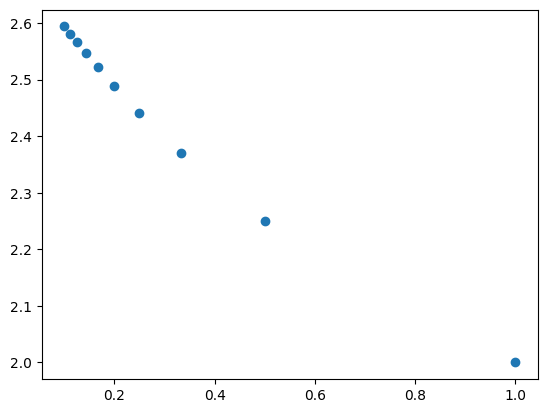

In [ ]:
plt.scatter(u, y)

In [ ]:
pc = polyfit(u, y, 7)
pf = poly1d(pc)

<ipython-input-19-791ca5ae54d4>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pc = polyfit(u, y, 7)


In [ ]:
pc

array([-0.13192894,  0.48465015, -0.85973757,  1.07935345, -1.1760354 ,
        1.24447758, -1.35905909,  2.71827982])

In [ ]:
print(pf)

         7          6          5         4         3         2
-0.1319 x + 0.4847 x - 0.8597 x + 1.079 x - 1.176 x + 1.244 x - 1.359 x + 2.718


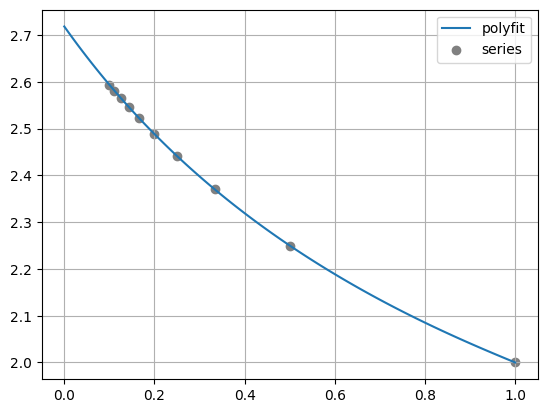

In [ ]:
xs = np.linspace(0, 1, 101)
ys = pf(xs)

plt.grid()
plt.plot(xs, ys, label="polyfit")
plt.scatter(u, y, c='gray', label="series")
plt.legend()

In [ ]:
y[-1]

2.5937424601000023

Extrapolation at $n\rightarrow\infty$, or $u\rightarrow0$

In [ ]:
pf(0)

2.718279818770004

Compare to the (more) exact value of e:

In [ ]:
_e_ = np.exp(1)
_e_

2.718281828459045

In [ ]:
#상대 오차
(pf(0) - _e_) / _e_

-7.39323281316898e-07

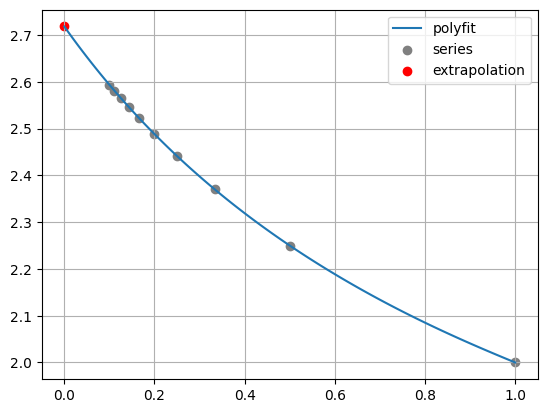

In [ ]:
plt.grid()
plt.plot(xs, ys, label="polyfit")
plt.scatter(u, y, c='gray', label="series")
plt.scatter(0, pf(0), c='r', label="extrapolation")
plt.legend()

# 시뮬레이션 응용 사례

### 속력의 제곱에 비례하는 공기 저항력을 받으며 운동하는 포물체 운동

In [ ]:
v0 = 120                # in [m/s]
deg = np.pi/180 # in rad
theta = 55 * deg
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)
x0, y0 = 0, 0           # in [m]
g = 9.8                 # in [m/s^2]
drag = 0.2             # in [N/(m/s)^2]
dt=0.05                  # time in [s]

def f(t, S):
  x, y, vx, vy = S
  v = np.sqrt(vx**2 + vy**2)
  ax, ay = - drag * v * np.array([vx, vy]) + np.array([0, -g])
  return np.array([vx, vy, ax, ay])

def rk4step(dSdt, t, S, h):
  k1 = f(t,       S)
  k2 = f(t + h/2, S + k1 * h/2)
  k3 = f(t + h/2, S + k2 * h/2)
  k4 = f(t + h,   S + k3 * h)

  S = S + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4) * h
  t = t + h

  return t, S

t0 = 0.0
S0 = np.array([x0, y0, vx0, vy0])
sol = np.array(S0)
ts = np.array(t0)

t, S = t0, S0
for n in range(60):
  t, S = rk4step(f, t, S, dt)
  sol = np.append(sol, S)
  ts = np.append(ts, t)

In [ ]:
sol=sol.reshape(-1,4).T

In [ ]:
ts.shape

(61,)

In [ ]:
xsim, ysim, vxsim, vysim = sol

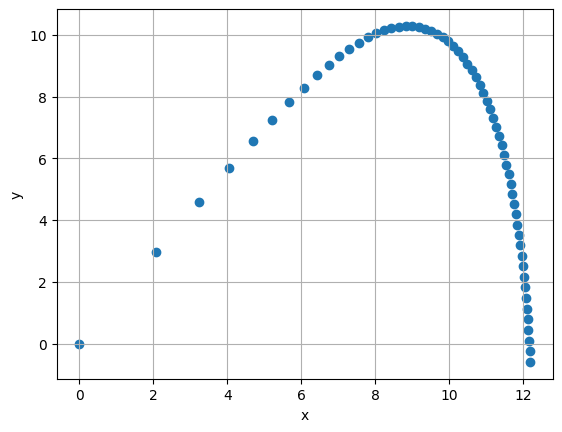

In [ ]:
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(xsim, ysim)

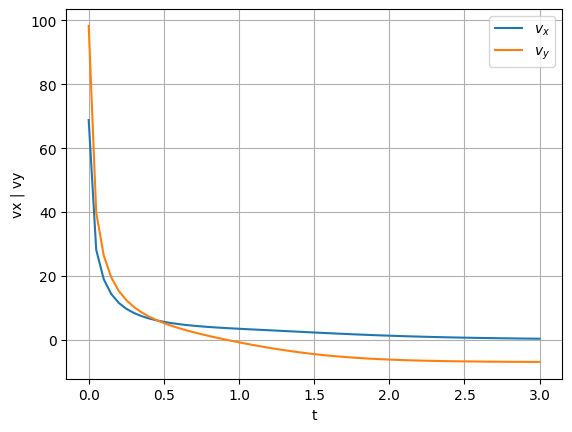

In [ ]:
plt.grid()
plt.xlabel("t")
plt.ylabel("vx | vy")
plt.plot(ts, vxsim, label = r"$v_x$")
plt.plot(ts, vysim, label = r"$v_y$")
plt.legend()

* 정확한 비행 시간은?

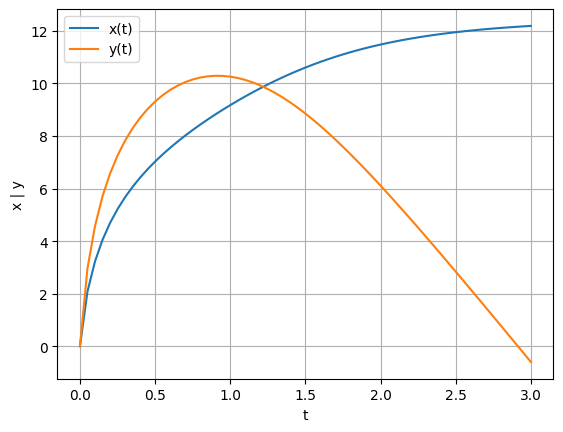

In [ ]:
plt.grid()
plt.xlabel("t")
plt.ylabel("x | y")
plt.plot(ts, xsim, label="x(t)")
plt.plot(ts, ysim, label="y(t)")
plt.legend()

In [ ]:
pcty = polyfit(ts[20:], ysim[20:], 7)
pfty = poly1d(pcty)
print(pfty)

          7          6         5         4         3         2
-0.03265 x + 0.5126 x - 3.341 x + 11.43 x - 20.81 x + 15.69 x - 1.64 x + 8.442


<ipython-input-38-e45bc16ea226>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pcty = polyfit(ts[20:], ysim[20:], 7)


In [ ]:
from scipy.optimize import fsolve

In [ ]:
tsol = fsolve(pfty,[1.5, 2.5])
tsol

array([2.91409418, 2.91409418])

In [ ]:
tfit = np.linspace(2,3,101)
yfit = pfty(tfit)

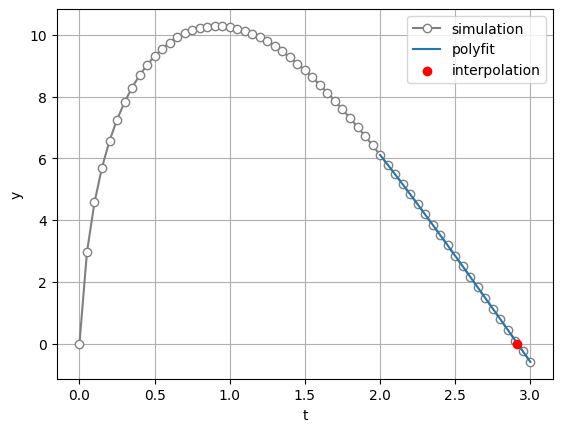

In [ ]:
plt.grid()
#plt.xlim(0,2)
#plt.ylim(-1,5)
plt.plot(ts, ysim, c='gray', marker='o', mfc='white', label="simulation")
plt.plot(tfit, yfit, label="polyfit")
plt.scatter(tsol[0], 0, c='red', label="interpolation", zorder=2)
plt.xlabel("t")
plt.ylabel("y")
plt.legend()

In [ ]:
pctx = polyfit(ts[20:], xsim[20:], 7)
pftx = poly1d(pctx)
xfit = pftx(tfit)

<ipython-input-43-7f092dbe8d82>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pctx = polyfit(ts[20:], xsim[20:], 7)


In [ ]:
R = pftx(tsol[0])
R

12.158897500213548

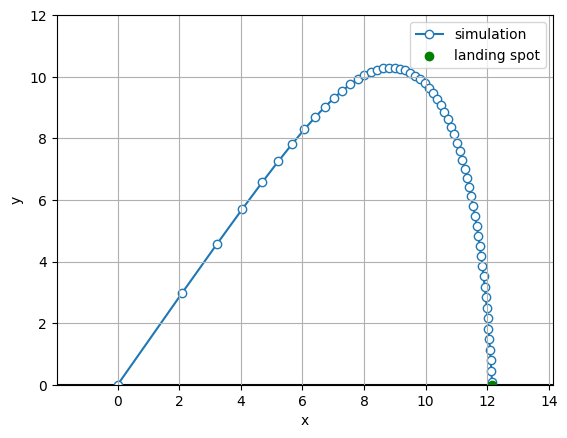

In [ ]:
plt.grid()
plt.axis("equal")
plt.xlim([0,R])
plt.ylim([0,12])
plt.xlabel("x")
plt.ylabel("y")
#plt.plot(xfit, yfit, c="red", label="polyfit", zorder=2)
plt.plot(xsim, ysim, marker='o', mfc="white", label="simulation", zorder=1)
plt.scatter(R, 0, c="g", marker='o', label="landing spot", zorder=2)
plt.axhline(0, c='k', zorder=-1)
plt.legend()

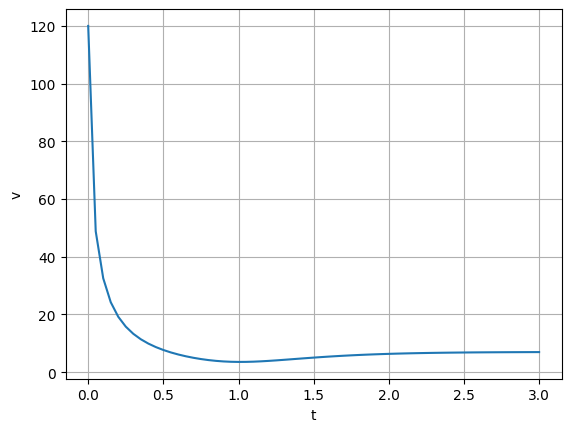

In [ ]:
plt.grid()
plt.xlabel("t")
plt.ylabel("v")
plt.plot(ts, np.sqrt(vxsim**2 + vysim**2))